## Problem statement 

The purpose of this report is to explore data from Divvy bikes usage over the past 5 years and provide reccomendations on how Divvy can improve its ridership and accessibility. In order to complete this objective, we used four guiding research questions. 

1. What factors influence the likelihood of a ride being requested? does the location influence the likelihood of a ride being requested? Are there correlations with high/low volumes of ride requests and the time of year? how do rides being requested relate to Chicago traffic congestion? 

2. How have divvy bike ridership trends compared to CTA ridership over recent years? Are these two forms of public transport competitors or do they serve different purposes? 

3. What economic qualities of a community around divvy bike docks boost ridership? What are some communities around the Chicago area that show similar qualities and will benefit from having more divvy bike docks?

4. How do key demographic characteristics of Chicago neighborhoods, specifically income level, racial composition, and age distribution, relate to the number of Divvy bike rides starting in those neighborhoods?

The results of these exploratory questions will help us to provide Divvy with recommendations on how to best proceed and accomplish their goals.

## Data sources


### [Divvy Data](https://divvy-tripdata.s3.amazonaws.com/index.html)

Ride data from divvy bikes and stations spanning from April 2020 to October 2025. Data includes ride start and end times, location, and rider type (member or casual).

### [Jonas Data](https://catalog.data.gov/dataset/chicago-traffic-tracker-historical-congestion-estimates-by-region-2018-current)

Chicago Traffic estimates from 2018 to 2024. Data includes the speed at which the traffic is flowing, latitude/longitude values, region ID, and time stamps for when the measurement was taken. 

### [Rebecca Data](http://data.cityofchicago.org/dataset/CTA-Ridership-Daily-Boarding-Totals/6iiy-9s97)

CTA bus and train ridership data. Each row is a day of data that includes bus, train, and total rider counts.

### [Victoria Data]()
##### [Chicago Community Areas GeoJSON](https://www.kaggle.com/datasets/doyouevendata/chicago-community-areas-geojson?resource=download)
- I used this as a base map and a reference for the community area names and boundaries in Chicago.
#### [Micro-Market Recovery Program - Permits](https://data.cityofchicago.org/d/4dpw-9rts )
- This data represents the response to the foreclosure and vacancy challenges Chicago faced in the wake of the foreclosure crisis.
- The permits in this dataset suggest locations where before vacant locations will now be renovated for housing or business use, offering insight to areas of potential growth and revitalization within Chicago communities.
#### [Chicago Business Licenses](https://data.cityofchicago.org/d/uupf-x98q)
-This dataset contains information about businesses in Chicago, including their locations and types.
- I used this dataset to count the number of businesses in each community area, which helped me assess the economic activity and potential demand for Divvy bike stations in those areas.

### [Brandon Data]()
#### Divvy Data Set
Source: [Divvy Tripdata 2020](https://divvy-tripdata.s3.amazonaws.com/index.html)

- I specifically isolated just the Data from the year 2020
- The rows of the Data Set are individual rides, while the columns are attributes of the rides such as 'ride_id', 'rideable_type', 'started_at', 'ended_at' 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', and 'member_casual'

#### Census Data Set 2020
Source: [Income (Household, 2020 inflation-adjusted dollars)](https://data.census.gov/table/ACSST5Y2020.S1901?q=income&g=860XX00US60601,60602,60603,60604,60605,60606,60607,60608,60609,60610,60611,60612,60613,60614,60615,60616,60617,60618,60619,60620,60621,60622,60623,60624,60625,60626,60628,60629,60630,60631,60632,60633,60634,60636,60637,60638,60639,60640,60641,60642,60643,60644,60645,60646,60647,60649,60651,60652,60653,60654,60655,60656,60657,60659,60660,60661)

- each row is an income range
- The outermost columns are the different zip codes in chicago
- the middle level columns are "household" and "family"
- - On the website however I only filtered for "household" income
- the innermost level gives the "estimate" of the percentage of those income earners in the community, and the "margin of error"
- - again on the website I only filered for the "estimate"


Source: [Hispanic or Latino, Not Hispanic or Latino By Race](https://data.census.gov/table/DECENNIALDHC2020.P9?q=race&g=860XX00US60601,60602,60603,60604,60605,60606,60607,60608,60609,60610,60611,60612,60613,60614,60615,60616,60617,60618,60619,60620,60621,60622,60623,60624,60625,60626,60628,60629,60630,60631,60632,60633,60634,60636,60637,60638,60639,60640,60641,60642,60643,60644,60645,60646,60647,60649,60651,60652,60653,60654,60655,60656,60657,60659,60660,60661)

- each row is a different race
- each column is a different Chicago Zip code
- each data entry is the amount of people of that race in that particular zip code


Source: [Age and Sex](https://data.census.gov/table/ACSST5Y2023.S0101?q=race&g=860XX00US60601,60602,60603,60604,60605,60606,60607,60608,60609,60610,60611,60612,60613,60614,60615,60616,60617,60618,60619,60620,60621,60622,60623,60624,60625,60626,60628,60629,60630,60631,60632,60633,60634,60636,60637,60638,60639,60640,60641,60642,60643,60644,60645,60646,60647,60649,60651,60652,60653,60654,60655,60656,60657,60659,60660,60661)

- each row is an age range
- The outermost columns are the different zip codes in chicago
- the middle level columns are "total" and "percent", "male", "percent male", "female", "percent female"
- - On the website however I only filtered for "percent"
- the innermost level gives the "estimate" of the percentage of those income earners in the community, and the "margin of error"
- - again on the website I only filered for the "estimate"

#### SimpleMaps Data Set
source: [Simple Maps](https://simplemaps.com/data/us-zips?utm_source=chatgpt.com)

- each row is a zipcode in the US
- - I only downloaded the zip codes that are in Chicago
- each column is a different piece of info regarding the zip code such as "lat","lng","city","state_ID", etc
- - I only downloaded the "lat" and "lng" data (these values specifically are the "centroids of each zip)



## Data quality check / cleaning / preparation 

In [25]:
#| echo: false
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
import geopandas as gpd
from sklearn import metrics
from sklearn import impute

%matplotlib inline

### Divvy Data

Prior to using it for analysis, there were some missing values in the divvy dataset that needed to be imputed. There were missing values for start and end station name and id which were imputed by finding the coordinates of each datapoint and matching them with other rows of data that did not have missing values. Additionally, there were 34,161 rows of data missing end longitude and latitude values which were dropped as they are statistically insignificant in terms of the large scale of data included in this dataset.

The final imputed data looks like this:

In [18]:
#| echo: false
import pandas as pd
divvy_data = pd.read_csv('../data/imputed_divy.csv', index_col=0)

/var/folders/8x/z6r7wqnn0dj75xm3g1lwn7gm0000gn/T/ipykernel_54982/4011998384.py:3: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  divvy_data = pd.read_csv('../data/imputed_divy.csv', index_col=0)


In [19]:
#| echo: false
def generate_tables(df):
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    cat_data = []
    
    for col in cat_cols:
        counts = df[col].value_counts()
        unique_count = df[col].nunique()
        missing_count = df[col].isnull().sum()

        if unique_count > 5:
            top_counts = counts.head(5).to_dict()
            dist_str = ", ".join([f"{k}: {v}" for k, v in top_counts.items()])
            dist_label = "Top 5 Levels"
        else:
            all_counts = counts.to_dict()
            dist_str = ", ".join([f"{k}: {v}" for k, v in all_counts.items()])
            dist_label = "All Levels"

        cat_data.append({
            'Variable': col,
            'Missing': missing_count,
            'Unique': unique_count,
            'Distribution': dist_str
        })
    
    cat_df = pd.DataFrame(cat_data)

    num_cols = df.select_dtypes(include=['number']).columns
    num_data = []
    
    for col in num_cols:
        num_data.append({
            'Variable': col,
            'Missing': df[col].isnull().sum(),
            'Mean': df[col].mean(),
            'Median': df[col].median(),
            'Std Dev': df[col].std(),
            'Min': df[col].min(),
            'Max': df[col].max()
        })
        
    num_df = pd.DataFrame(num_data)

    date_cols = df.select_dtypes(include=['datetime', 'datetime64', 'datetimetz']).columns
    date_data = []
    
    for col in date_cols:
        date_data.append({
            'Variable': col,
            'Missing': df[col].isnull().sum(),
            'Unique': df[col].nunique(),
            'Start Date': df[col].min(),
            'End Date': df[col].max()
        })
        
    date_df = pd.DataFrame(date_data)

    return cat_df, num_df, date_df

divvy_data['started_at'] = pd.to_datetime(divvy_data['started_at'], format = 'mixed')
divvy_data['ended_at'] = pd.to_datetime(divvy_data['ended_at'], format = 'mixed')

categorical_table, numerical_table, date_table = generate_tables(divvy_data)

print("--- Categorical Variables ---")
display(categorical_table)

print("\n--- Numerical Variables ---")
display(numerical_table)

print("\n--- Date Variables ---")
display(date_table)
            


--- Categorical Variables ---


,Variable,Missing,Unique,Distribution
0,ride_id,0,30979313,"C5EF63A2DE8E57A8: 2, 99BE5F7298A6460C: 2, 1B57..."
1,rideable_type,0,4,"electric_bike: 14619753, classic_bike: 1311731..."
2,start_station_name,0,2461,"Public Rack: 1290105, Streeter Dr & Grand Ave:..."
3,start_station_id,0,5183,"Public Rack: 1290108, 13022: 298201, 13300: 18..."
4,end_station_name,0,2467,"Public Rack: 1361272, Streeter Dr & Grand Ave:..."
5,end_station_id,0,4887,"Public Rack: 1361567, 13022: 301904, LF-005: 1..."
6,member_casual,0,2,"member: 18754183, casual: 12225509"



--- Numerical Variables ---


,Variable,Missing,Mean,Median,Std Dev,Min,Max
0,start_lat,0,41.902654,41.898969,0.045114,41.63,45.635034
1,start_lng,0,-87.646539,-87.643044,0.027955,-87.94,-73.796477
2,end_lat,0,41.902961,41.899930,0.053700,0.00,87.960000
3,end_lng,0,-87.646743,-87.643118,0.076220,-144.05,152.530000



--- Date Variables ---


,Variable,Missing,Unique,Start Date,End Date
0,started_at,0,27614067,2020-04-01 00:00:30,2025-10-31 23:56:47.949
1,ended_at,0,27621226,2020-04-01 00:10:45,2025-10-31 23:59:56.995


### Jonas Data Cleaning

In [3]:
#| echo: false
traffic = pd.read_csv("../data/Chicago_Traffic_Tracker_-_Historical_Congestion_Estimates_by_Region_-_2018-Current.csv")

In [4]:
#| echo: false
numerical_vars = ['REGION_ID', 'SPEED', 'MONTH', 'WEST', 'EAST', 'SOUTH', 'NORTH']
numerical_df = {}
for var in numerical_vars:
    numerical_df[var] = traffic[var].describe()
numerical = pd.DataFrame(numerical_df).T
numerical['missing'] = None
for var in numerical_vars:
    numerical.loc[var, 'missing'] = traffic[var].isnull().sum()
print("Numerical Variables\n")
display(numerical)
print('\nTime stamps')

dates = pd.DataFrame()
dates['variable'] = ['TIME']
dates['missing'] = traffic['TIME'].isnull().sum()
dates['unique'] = traffic['TIME'].nunique()
dates['start date'] = traffic['TIME'].min()
dates['end date'] = traffic['TIME'].max()
display(dates)


Numerical Variables



,count,mean,std,min,25%,50%,75%,max,missing
REGION_ID,10227006.0,15.000022,8.366605,1.000000,8.000000,15.000000,22.000000,29.000000,0
SPEED,10227006.0,23.552170,8.533045,0.000000,21.820000,25.230000,27.950000,173.860000,0
MONTH,10227006.0,6.544033,3.382663,1.000000,4.000000,7.000000,9.000000,12.000000,0
WEST,10227006.0,-87.701910,0.067660,-87.846210,-87.747456,-87.685372,-87.647208,-87.584845,0
EAST,10227006.0,-87.642355,0.062508,-87.747456,-87.674590,-87.646438,-87.606334,-87.524436,0
SOUTH,10227006.0,41.824520,0.097402,41.644139,41.764066,41.822792,41.909269,41.997946,0
NORTH,10227006.0,41.867706,0.094377,41.677477,41.822792,41.866129,41.931841,42.026444,0



Time stamps


,variable,missing,unique,start date,end date
0,TIME,0,455875,01/01/2019 01:01:38 PM,12/31/2024 12:50:42 PM


### Rebecca Data Cleaning

My CTA dataset did not require much cleaning. I did however cut down the data to match the dates provided in the Divvy dataset. 

In [22]:
#| echo: false
CTA = pd.read_csv("../data/CTA_Ridership_Totals.csv")
numerical_vars = ['bus', 'rail_boardings', 'total_rides']
CTA_numerical = CTA[numerical_vars]
CTA_numerical.describe()

,bus,rail_boardings,total_rides
count,9039,9039,9039
unique,8997,8978,9002
top,"943,778","716,772","1,646,096"
freq,2,2,2


#### Victoria Data Cleaning
For my two datasets, I chose to use the zip codes to impute missing latitude and longitude values. For the business license data, I dropped values that were still not there after imputation.

In [ ]:
#| echo: false
biz = pd.read_csv("../victoriadata/Business_Licenses_-_Current_Active_20251201.csv",low_memory=False)
mmrp = pd.read_csv("../victoriadata/Micro-Market_Recovery_Program_-_Permits_20251201.csv",low_memory=False)
biz_missing = biz[['LATITUDE', 'LONGITUDE']].isna().sum()
mmrp_missing = mmrp[['Latitude', 'Longitude']].isna().sum()
print("Business licenses missing coordinates:",biz_missing)
print("MMRP permits missing coordinates:",mmrp_missing)

In [ ]:
#| echo: false
biz_geo= biz[biz[['LATITUDE', 'LONGITUDE']].notna().all(axis=1)]
biz_zip= (biz_geo.dropna(subset=['ZIP CODE']).groupby('ZIP CODE')[['LATITUDE', 'LONGITUDE']].mean().reset_index())

biz_geo_missing= biz[biz[['LATITUDE', 'LONGITUDE']].isna().any(axis=1)]
biz_geo_missing= biz_geo_missing.merge(biz_zip,on='ZIP CODE',how='left',suffixes=('', '_zip'))
biz_geo_missing['LATITUDE']= biz_geo_missing['LATITUDE'].fillna(biz_geo_missing['LATITUDE_zip'])
biz_geo_missing['LONGITUDE']= biz_geo_missing['LONGITUDE'].fillna(biz_geo_missing['LONGITUDE_zip'])
biz_geo_missing= biz_geo_missing.drop(columns=['LATITUDE_zip', 'LONGITUDE_zip'])

biz=pd.concat([biz_geo, biz_geo_missing], ignore_index=True).dropna(subset=['LATITUDE', 'LONGITUDE'])

mmrp_geo=mmrp[mmrp[['Latitude', 'Longitude']].notna().all(axis=1)]
mmrp_zip= (mmrp_geo.dropna(subset=['Zip Code']).groupby('Zip Code')[['Latitude', 'Longitude']].mean().reset_index())

mmrp_geo_missing= mmrp[mmrp[['Latitude', 'Longitude']].isna().any(axis=1)]
mmrp_geo_missing=mmrp_geo_missing.merge(mmrp_zip, on='Zip Code',how='left',suffixes=('', '_zip'))
mmrp_geo_missing['Latitude']= mmrp_geo_missing['Latitude'].fillna(mmrp_geo_missing['Latitude_zip'])
mmrp_geo_missing['Longitude']= mmrp_geo_missing['Longitude'].fillna(mmrp_geo_missing['Longitude_zip'])
mmrp_geo_missing= mmrp_geo_missing.drop(columns=['Latitude_zip', 'Longitude_zip'])

mmrp=pd.concat([mmrp_geo, mmrp_geo_missing], ignore_index=True)
print("Business rows still missing coordinates:",biz[['LATITUDE','LONGITUDE']].isna().any(axis=1).sum())

print("MMRP rows still missing coordinates:",mmrp[['Latitude','Longitude']].isna().any(axis=1).sum())

### Brandon Data Cleaning

For my analysis I also had to clean / Prepare the census data to be ready for use. I started off by dropping any rows I knew I would not be using in my analysis. For example one such row gave the total percentage of all races in a neighborhood (it was always 100%). The next step I took was to convert all the data into numeric so that I could actually analyze the data. then I standardized the data by ensuring that every data point represented a percentage of a zip code. An example of me doing this was having the number of white people in a community and dividing it by the total to find this percent. I did this so that it matched the rest of the data which was in percentage form. The next step was to transpose all three of the census data sets so the each row represented one zip code in chicago and the columns gave information about those zip codes. I made the index of all three data sets the zip code. I then used the .concat() function to stack the data sets horizontelly. I could do this because the rows were organized in a ordered way (by zip code). After this I finally checked for missing values and was pleasently suprised to find that the census data the gov releases does not contain missing values.

This lays out all the steps that included cleaning and preparing data in analysis 4.

The tabular form of the distribution of values of each variable used in the analysis is shown below (I had no categorical variables):

In [31]:
#| echo: false
census_data = pd.read_csv("../Census_Data/census_data.csv", index_col=0)
def generate_tables(df):
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    cat_data = []
    
    for col in cat_cols:
        counts = df[col].value_counts()
        unique_count = df[col].nunique()
        missing_count = df[col].isnull().sum()

        if unique_count > 5:
            top_counts = counts.head(5).to_dict()
            dist_str = ", ".join([f"{k}: {v}" for k, v in top_counts.items()])
            dist_label = "Top 5 Levels"
        else:
            all_counts = counts.to_dict()
            dist_str = ", ".join([f"{k}: {v}" for k, v in all_counts.items()])
            dist_label = "All Levels"

        cat_data.append({
            'Variable': col,
            'Missing': missing_count,
            'Unique': unique_count,
            'Distribution': dist_str
        })
    
    cat_df = pd.DataFrame(cat_data)

    num_cols = df.select_dtypes(include=['number']).columns
    num_data = []
    
    for col in num_cols:
        num_data.append({
            'Variable': col,
            'Missing': df[col].isnull().sum(),
            'Mean': df[col].mean(),
            'Median': df[col].median(),
            'Std Dev': df[col].std(),
            'Min': df[col].min(),
            'Max': df[col].max()
        })
        
    num_df = pd.DataFrame(num_data)

    date_cols = df.select_dtypes(include=['datetime', 'datetime64', 'datetimetz']).columns
    date_data = []
    
    for col in date_cols:
        date_data.append({
            'Variable': col,
            'Missing': df[col].isnull().sum(),
            'Unique': df[col].nunique(),
            'Start Date': df[col].min(),
            'End Date': df[col].max()
        })
        
    date_df = pd.DataFrame(date_data)

    return cat_df, num_df, date_df

categorical_table, numerical_table = generate_tables(census_data)[:2]

print("\n--- Numerical Variables ---")
display(numerical_table)


--- Numerical Variables ---


,Variable,Missing,Mean,Median,Std Dev,Min,Max
0,Under 5 years,0,5.662500,6.000000,1.878739,0.000000,9.100000
1,5 to 9 years,0,4.810714,5.250000,2.119578,0.000000,8.000000
2,10 to 14 years,0,4.946429,5.550000,2.633557,0.000000,8.700000
3,15 to 19 years,0,5.485714,5.900000,2.529062,0.000000,13.200000
4,20 to 24 years,0,7.514286,6.950000,2.990678,3.100000,21.900000
5,25 to 29 years,0,11.275000,9.050000,5.334425,5.200000,26.900000
6,30 to 34 years,0,10.753571,8.300000,5.161711,5.400000,26.100000
7,35 to 39 years,0,8.057143,7.250000,3.870676,0.800000,27.800000
8,40 to 44 years,0,6.178571,6.300000,1.299750,1.300000,8.600000
9,45 to 49 years,0,5.876786,5.900000,1.135540,1.600000,9.000000


## Exploratory Data Analysis

### Analysis 1
*By Jonas Goldberg*

For my analysis, I sought to understand the trends of the Divvy ridership at each station, over time, and its relationship to traffic congestion. To solve these problems, I obtained the ridership counts at each station and created a bar plot with an appropriate scale for the y-axis (to adjust for outliers). I also obtained the total counts across each month for ridership. Lastly, to determine the congestion estimates, I obtained the top 33.3 and 66.6 percentiles for speed per region. The slower the speed of the traffic is, the higher the congestion. Next, I determined the closest time point in the traffic data set for each point in the Divvy dataset to obtain the nearest traffic estimate. I then categorized the congestion as "high," "medium," or "low" based on the speed estimate. 

I did not anticipate many problems. However, the main problems I encountered were running out of RAM and data analysis taking exceedingly long. 

To solve the RAM issue, I closed my browser and idle applications which solved the issue. The ladder problem proved to be significantly more challenging. After timing how long it takes to find the closest time stamps for 10,000 points, it became clear there wouldn't be enough time to naively calculate the closest timestsamp within the due date. I initially tried to parallelize the calculations. However, this initial approach did not work. 

Eventually, I devised an optimized algorithm which involved sorting the data, calculating the closest time stamp naively for the first time stamp, and leveraging the sorted time stamps to determine the closest time stamp without having to do subtractions on the entire dataset. 

Although I researched how to use threads and multiprocesses, this approach ultimately did not make it into the final report. Thus, I did not resort to using any code repositories for the final report.

### Analysis 2
*By Rebecca Lazarus*

In my analysis I focused on understanding the Divvy data and its relationship to other forms of public transportation currently avalible. The aim of this section of analysis was to estabilish an understandign of the current use of divvy bikes so that the stakeholders can determine if they want to continue on the current path or make different buisness decisions. I completed these aims by creating three different graphs from the Divvy and CTA datasets. 

In [27]:
#| echo: false
#Setting up consistent style for graphs
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
sns.set_theme(style="whitegrid")
colors = {
    'CTA': '#003366',  # Deep professional blue
    'Divvy': '#E31A1C' # Bright energetic orange
}
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'legend.fontsize': 12,
    'legend.title_fontsize': 13
})
def clean_spines(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

#DIVVY DATA
#convert start date for graphing
divvy_data['started_at'] = pd.to_datetime(divvy_data['started_at'], format = 'mixed')
divvy_data['month_year'] = divvy_data['started_at'].dt.to_period('M')
counts = divvy_data.groupby('month_year').size().reset_index(name='count')
counts['month_year'] = counts['month_year'].dt.to_timestamp()

#CTA DATA
#prep for graph
CTA['total_rides'] = pd.to_numeric(CTA['total_rides'].astype(str).str.replace(',', ''), errors='coerce')
CTA['bus'] = pd.to_numeric(CTA['bus'].astype(str).str.replace(',', ''), errors='coerce')
CTA['rail_boardings'] = pd.to_numeric(CTA['rail_boardings'].astype(str).str.replace(',', ''), errors='coerce')
CTA['service_date'] = pd.to_datetime(CTA['service_date'])
CTA['year'] = CTA['service_date'].dt.year
CTA['month_year'] = CTA['service_date'].dt.to_period('M')
CTA['month_year'] = CTA['month_year'].dt.to_timestamp()
CTA_2020_on = CTA[(CTA['month_year'] >= pd.Timestamp('2020-04-01')) & (CTA['month_year'] <= pd.Timestamp('2025-10-01'))]
CTA_monthly = CTA_2020_on.groupby('month_year', as_index=False)['total_rides'].sum()


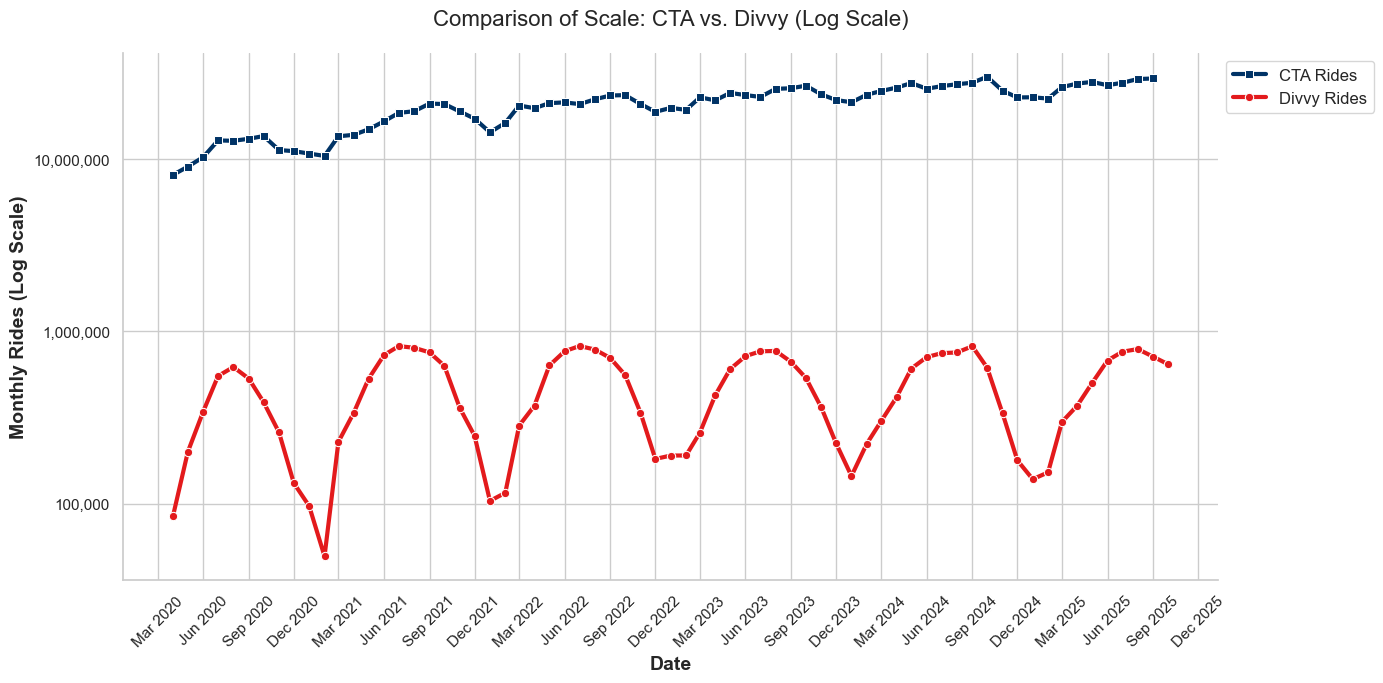

In [28]:
#| echo: false
fig, ax = plt.subplots(figsize=(14, 7))

# Plot CTA
sns.lineplot(
    data=CTA_monthly, 
    x='month_year', 
    y='total_rides', 
    color=colors['CTA'], 
    marker='s', 
    label='CTA Rides',
    linewidth=3,
    ax=ax
)

# Plot Divvy
sns.lineplot(
    data=counts, 
    x='month_year', 
    y='count', 
    color=colors['Divvy'], 
    marker='o', 
    label='Divvy Rides',
    linewidth=3,
    ax=ax
)

ax.set_yscale('log')
plt.title('Comparison of Scale: CTA vs. Divvy (Log Scale)', fontsize=16, pad=20)
plt.ylabel('Monthly Rides (Log Scale)', fontweight='bold')
plt.xlabel('Date', fontweight='bold')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)

clean_spines(ax)
plt.legend(bbox_to_anchor = (1,1))
plt.tight_layout();

The first graph compares total ridership counts for each platform from 2020 - 2025. This graph presents a multitude of findings. First, it is clear from the graph that the CTA experiences significantly higher ridership in general than Divvy bikes. This is likely due to the fact that the CTA is more well known, accessible to people of all ages and abilities (riding a Divvy bike requires the skill of riding a bike), and has stations in more parts of the city. Additionally, while both Divvy and CTA ridership has been steadily increasing since 2020 (recovery from covid and has continued increasing since then), CTA trends seem more stabel than the Divvy data. Finally, Changes in one line do not seem to impact the other indicating that these two datasets are independent of one another and major changes in one of their riderships will not significantly impact the ridership of the other. This shows that the CTA and Divvy bikes are neither direct competitors nor substitutes but rather that in their current capacity, they are serving different user bases or at least different purposes.

These conclusions are further backed up by my other two graphs.

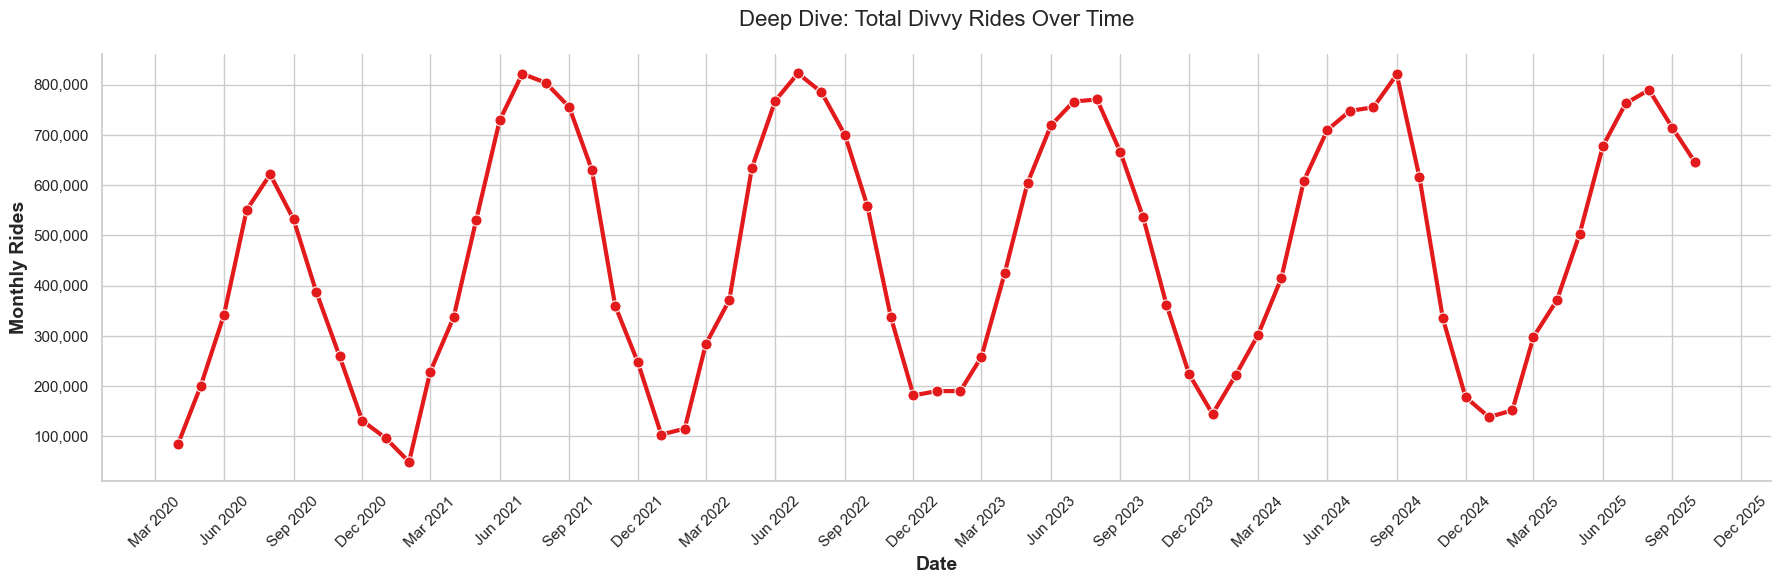

In [29]:
#| echo: false
#Look closer at just Divvy
plt.figure(figsize=(18, 6))
ax = sns.lineplot(data=counts, x = 'month_year', y = 'count', marker = 'o', color=colors['Divvy'], markersize=8, linewidth=3)
plt.title('Deep Dive: Total Divvy Rides Over Time', pad=20)
plt.ylabel('Monthly Rides', fontweight='bold')
plt.xlabel('Date', fontweight='bold')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)
clean_spines(ax)
plt.tight_layout();

The second graph provides a closer look at just the Divvy data over time. This graph highlights the flunctuations in ridership that are connected to the season. DIvvy ridership peaks in the summer and hits its minimum during the winter. This is likely due to the fact that using a Divvy bike exposes the user to the weather and outdoors conditions. In the summertime, many people will enjoy a bike ride by the lake in warm weather but much fewer will be inclined to ride outside in the wind, rain, and snow that comes with a Chicago winter. The existence of these fluctuations is unavoidable with the use of public bikes, however it also indicates that there are other transportation options people use over Divvy bikes. During the winter, people who may have previously chosen to ride a bike will instead decide to take the train, bus, or a car. The dip in Divvy ridership during the winter demonstrates that many Divvy riders use Divvy bikes not out of necessity but out of choice.

/var/folders/02/vhd5ybdx0vj7z1jf7ckg0zv40000gn/T/ipykernel_28627/856359455.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CTA_2020_on['day_name'] = CTA_2020_on['service_date'].dt.day_name()


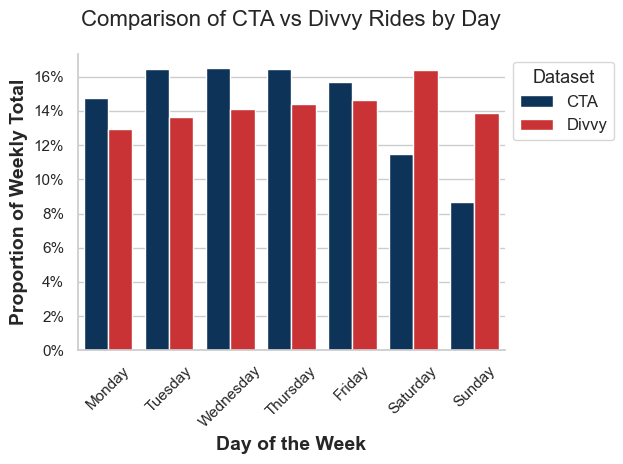

In [30]:
#| echo: false
#Day of the week Analysis
CTA_2020_on['day_name'] = CTA_2020_on['service_date'].dt.day_name()
CTA_grouped = CTA_2020_on.groupby('day_name')['total_rides'].sum().reset_index()
CTA_grouped['Proportion'] = CTA_grouped['total_rides'] / CTA_grouped['total_rides'].sum()
CTA_grouped['Dataset'] = 'CTA'
CTA_Day_data = CTA_grouped[['day_name', 'Proportion', 'Dataset']]

divvy_data['day_name'] = divvy_data['started_at'].dt.day_name()
divvy_counts = divvy_data.groupby('day_name').size().reset_index(name='count')
divvy_Day_data = divvy_counts[['day_name', 'count']].copy()
divvy_Day_data.columns = ['day_name', 'Rides']
divvy_Day_data['Proportion'] = divvy_Day_data['Rides'] / divvy_Day_data['Rides'].sum()
divvy_Day_data['Dataset'] = 'Divvy'
divvy_Day_data = divvy_Day_data[['day_name', 'Proportion', 'Dataset']]
combined_data = pd.concat([CTA_Day_data, divvy_Day_data])

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ax = sns.barplot(
    data=combined_data, 
    x='day_name', 
    y='Proportion', 
    hue='Dataset', 
    order=days_order,
    palette=colors
)
plt.title('Comparison of CTA vs Divvy Rides by Day', pad=20)
plt.ylabel('Proportion of Weekly Total', fontweight='bold')
plt.xlabel('Day of the Week', fontweight='bold')
plt.xticks(rotation=45)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.legend(title='Dataset', title_fontsize='13', bbox_to_anchor = (1,1))
clean_spines(ax)
plt.tight_layout();

My third graph compares Divvy and CTA ridership for each day of the week. This graph clearly shows that CTA has a higher proportion of its weekly riders during weekdays (Monday - Friday) than Divvy bikes. Divvy, on the other hand, tops CTA's proportion of riders for both days of the weekend (Saturday and Sunday). This likely indicates that the CTA is more often used by its riders for commuting whereas Divvy bikes are more likely used for leisure and pleasure. While both modes of transport surely provide both modes of commute as well as pleasure, Divvy's significant weekend usage is likely correlated to the fact that users have a break from work and are chosing to spend part of their day off taking a bike ride. The CTA, on the other hand, provides consisten timing and easy transport for relatively cheap on a daily basis and is likely fulfuiling more of the commuting purpose than Divvy bikes. 

This analysis does not mean that Divvy isn't providing vital services to the city of Chicago. Despite the general trends showing that Divvy bikes are used for leisure, there are still many who rely on the bikes for their everyday form of transport. This analysis simply provides a baseline for Divvy to understand how their product is currently being utalized by the general market in order to focus its expansion efforts on ways to increase its impact.

### Analysis 3
*By Victoria Yu*

In [ ]:
#| echo: false
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
import geopandas as gpd
from sklearn import metrics
from sklearn import impute

%matplotlib inline
from glob import glob
files=sorted(glob("../data/*.csv"))
chi=gpd.read_file("../chicago-community-areas.geojson")

dfs = []
for f in files:
    temp = pd.read_csv(f, low_memory=False)
    dfs.append(temp)
divvy= pd.concat(dfs, ignore_index=True)

#fill in missing station names based on IDs- Victoria's way
station_reference= (divvy[['start_station_id', 'start_station_name']].dropna().drop_duplicates())
divvy= divvy.merge(station_reference,on='start_station_id',how='left',suffixes=("", "_ref"))
divvy['start_station_name'] = divvy['start_station_name'].fillna(divvy['start_station_name_ref'])
divvy= divvy.drop(columns=['start_station_name_ref'])

df_loc= divvy.dropna(subset=['start_lat', 'start_lng'])
#sample to keep numbers manageable
if len(df_loc) > 200_000:
    df_loc= df_loc.sample(200_000, random_state=0)
divvy['started_at']= divvy['started_at'].astype(str).str.strip()
divvy['started_at']= pd.to_datetime(divvy['started_at'],errors='coerce',format='mixed')
divvy['year']= divvy['started_at'].dt.year

docked= divvy.dropna(subset=['start_station_id'])
stations_2025_ids= (docked.loc[docked['year'] == 2025, 'start_station_id'].unique())
docked_2025_universe = docked[
    docked['start_station_id'].isin(stations_2025_ids)]
stations = (docked_2025_universe.groupby('start_station_id')
    .agg(year_opened=('year', 'min'),station_name=('start_station_name', 'first'),lat=('start_lat', 'first'),lng=('start_lng', 'first'))
    .reset_index().rename(columns={'start_station_id': 'station_id'}))

stations['year_opened'].value_counts().sort_index()
years = np.arange(2020, 2026)
minx, miny, maxx, maxy = chi.total_bounds

fig, axes=plt.subplots(2, 3, figsize=(12, 10), sharex=True, sharey=True)
axes_flat= axes.ravel()

for i, year in enumerate(years):
    ax=axes_flat[i]
    subset=stations[stations['year_opened'] == year]
    bw=0.2
    if year == 2022:
        bw=0.1
    sns.kdeplot(data=subset,x='lng',y='lat',fill=True,
        bw_adjust=bw,cmap='YlGnBu',ax=ax)

    chi.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1)

    if year == 2020:
        ax.set_title("Docks in 2020")
    else:
        ax.set_title(f"New docks built in {year}")

    ax.set_xlim(minx, maxx)
    ax.set_ylim(miny, maxy)
    ax.set_xlabel("")
    ax.set_ylabel("")
plt.show()

I was specifically looking for divvy bike docks data so I cleaned it by standardizing station names and removing dockless trips without station IDs. Because the IDs are assigned to every dock that was ever built, I used 2025 data to get the currently active dock data and found the first occurance of each dock in the past years. Then, I plotted the new docks each year to observe installation trends. 
I chose to plot them seperately because I wanted to observe the geographical density of the docks each year. This was successfull because now I can see that other than within downtown Chicago, each year focused on expanding divvy bikes to 3-4 wards in the surrounding communities. This is important because in my further analysis I can give suggestions for the upcoming year on which communities to build new docks in

The first issue I encountered was that the divvy dataset was way too large and my computer could not produce a plot. I solved this by using sampling to contain the number of values. I found this feasible because I was only looking for the year of first occurance, therefore each year will still have the information of the first occurance no matter the specific date. 

The second issue was expected, which was due to covid, 2022 had significantly less docks built and the heatmap was weird compared to the others. I solved it by making the bandwidth smaller specifically for 2022 so it is more precise. 


In [ ]:
#| echo: false
biz_gdf= gpd.GeoDataFrame(biz,geometry=gpd.points_from_xy(biz['LONGITUDE'], biz['LATITUDE']),crs="EPSG:4326")
mmrp_gdf=gpd.GeoDataFrame(mmrp,geometry=gpd.points_from_xy(mmrp['Longitude'], mmrp['Latitude']),crs="EPSG:4326")

stations_gdf= gpd.GeoDataFrame(stations,geometry=gpd.points_from_xy(stations['lng'], stations['lat']),crs="EPSG:4326")
stations_in_comm= gpd.sjoin(stations_gdf.to_crs(chi.crs),chi,how='inner',predicate='within')
station_counts= (stations_in_comm.groupby('community').size().reset_index(name='station_count'))

biz_joined= gpd.sjoin(biz_gdf,chi,how='inner',predicate='within')
business_counts= (biz_joined.groupby('community').size().reset_index(name='business_count'))

mmrp_joined= gpd.sjoin(mmrp_gdf,chi,how='inner',predicate='within')
mmrp_counts= (mmrp_joined.groupby('community').size().reset_index(name='mmrp_count'))

community_stats= (station_counts.merge(business_counts, on='community', how='left').merge(mmrp_counts, on='community', how='left'))
community_stats[['business_count', 'mmrp_count']] = (community_stats[['business_count', 'mmrp_count']].fillna(0))

comm_with_counts = chi.merge(station_counts, on='community', how='left')
comm_with_counts['station_count'] = comm_with_counts['station_count'].fillna(0)

community_stats['econ_total'] = (community_stats['business_count'] + community_stats['mmrp_count'])
community_stats['bike_need_index'] = (community_stats['econ_total'] / (community_stats['station_count'] + 1))

potential_map=chi.merge(community_stats[['community', 'station_count', 'econ_total', 'bike_need_index']],on='community',how='left')

fig, axes = plt.subplots(1, 3, figsize=(24, 8))
ax1, ax2, ax3 = axes

chi.plot(ax=ax1,edgecolor='black',facecolor='none')
biz_gdf.plot(ax=ax1,markersize=1,color='tab:blue',alpha=0.3,label="Business license")
mmrp_gdf.plot(ax=ax1,markersize=1,color='tab:orange',alpha=0.3,label="MMRP permit")

ax1.set_title("Business licenses & MMRP permits")
ax1.set_xlabel("Longitude")
ax1.set_ylabel("Latitude")
ax1.set_aspect('equal', 'box')
ax1.legend(markerscale=5)


comm_with_counts.plot(ax=ax2,column='station_count',cmap='YlGnBu',legend=True,edgecolor='black')
ax2.set_title("Number of Divvy stations\nper community")

potential_map.plot(ax=ax3,column='bike_need_index',cmap='Reds',legend=True,edgecolor='black')
ax3.set_title("Business & MMRP activity\nper Divvy station\n(higher = greater need)")


plt.tight_layout()
plt.show()

In [ ]:
#| echo: false
top_potential = (community_stats.sort_values('bike_need_index', ascending=False).head(3)[['community', 'bike_need_index']])
print("Top 3 communities with highest bike need index:")
print(top_potential.to_string(index=False))

After analyzing the Divvy dock expansion, I incorporated the business licenses dataset and the Micro-Market Recovery Program (MMRP) permits to better understand the economic context of different Chicago communities. I cleaned both datasets by using zip codes to impute missing longitudes and latitudes and removing entries with missing zip codes so that the dataset is more complete. I then plotted businesses and MMRP permits together over the Chicago community area boundaries to visually identify where economic activity is concentrated across the city. This helped establish which areas might start to generate higher demand for bike access due to business or recovery investment.

Next, I counted the number of Divvy stations within each Chicago community by joining station coordinates to the community areas. I visualized these counts as a choropleth map, which clearly showed that Divvy stations are unevenly distributed across neighborhoods, with some communities having far fewer docks than others. 

The last graph was created to directly compare bike infrastructure to potential economic activity. I combined the business counts and MMRP permit counts into a single economic activity measure and normalized it by the number of Divvy stations in each community. I created a bike-need index that highlights communities where business activity is high but access to Divvy bikes is relatively low.

Based on the results, several communities showed consistently high economic activity but relatively low station counts, suggesting they should be prioritized for future Divvy dock expansion. They are Englewood, Woodlawn, and Grand Boulevard.

I had trouble grouping the business licenses and MMRP permits by community area because both datasets only had latitude and longitude coordinates, not community names. I solved this by performing a spatial join between the permit/business locations and the community area polygons, which allowed me to assign each permit/business to its corresponding community. This was successful because it enabled me to accurately count the number of businesses and permits in each community area.

### Analysis 4
*By Brandon Wolmer*

In [32]:
#| echo: false

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
import geopandas as gpd
from sklearn import metrics
from sklearn import impute

%matplotlib inline

In [37]:
#| echo: false

census_data = pd.read_csv("../Census_Data/census_data.csv", index_col=0)
#divvy_data = pd.read_csv('../data/imputed_divy.csv', index_col=0)

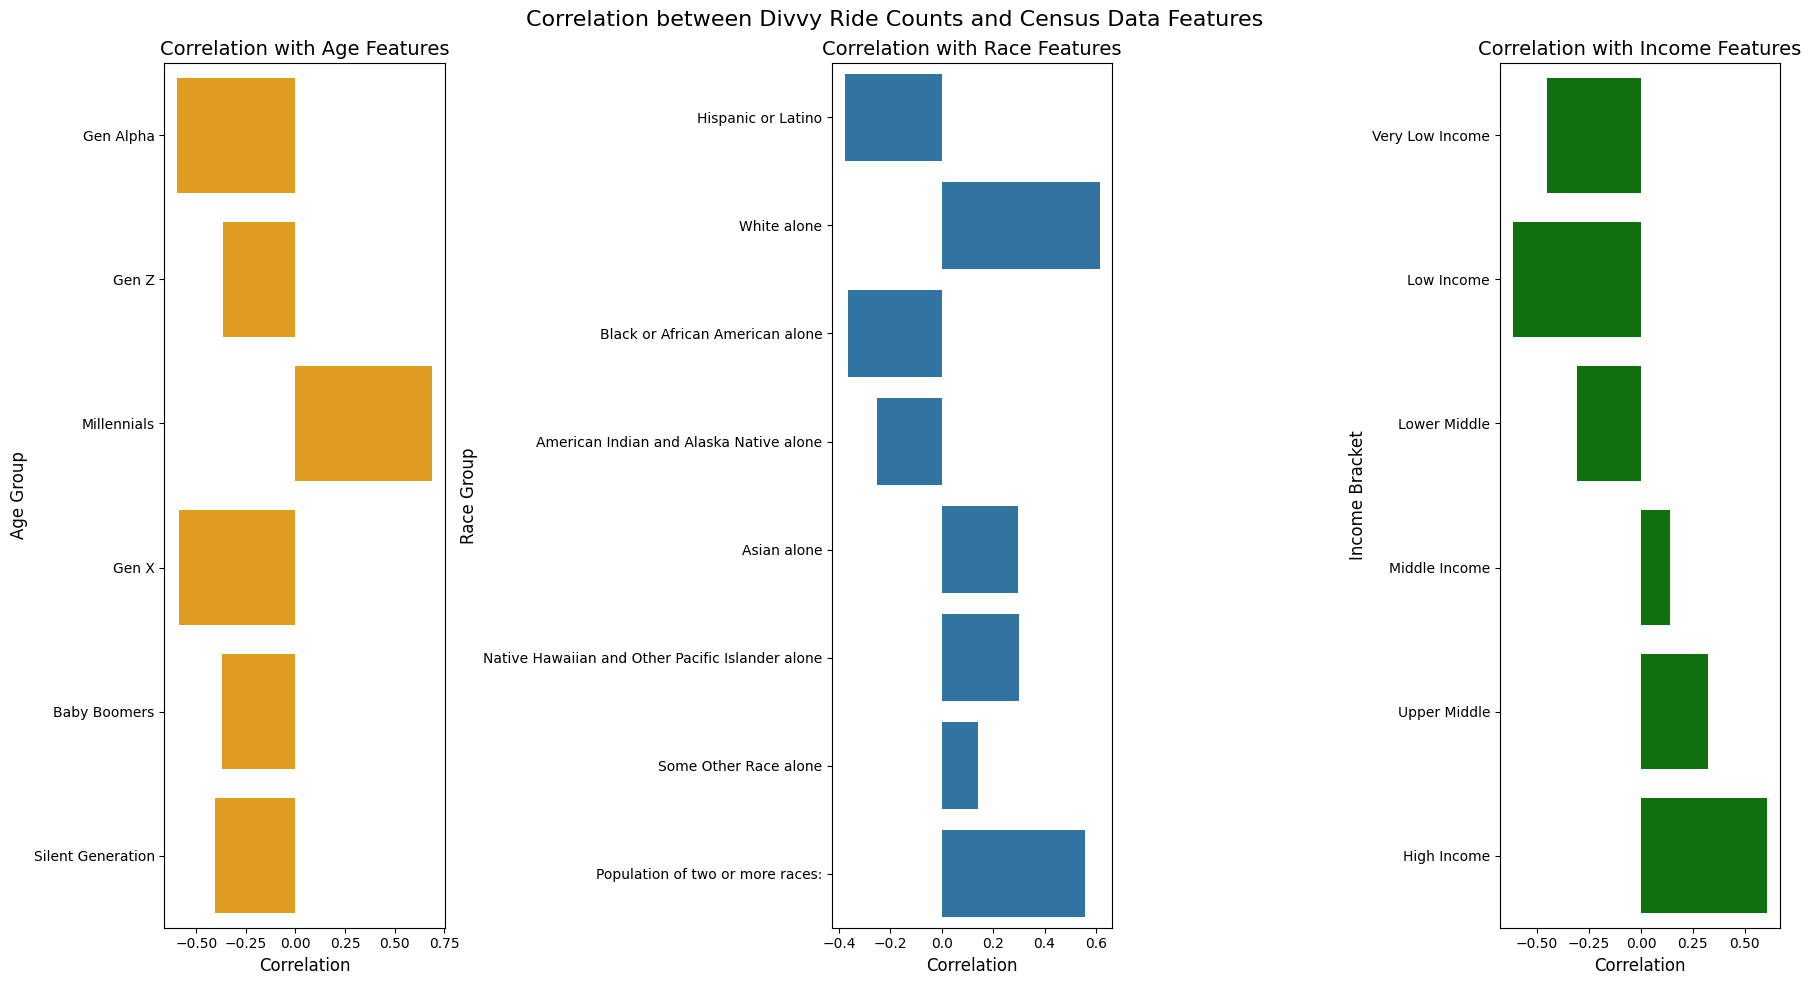

In [38]:
#| echo: false

# Correlation Barplot between Divvy Ride Counts and Census Data Features - By Brandon Wolmer

corr = census_data.corr()['divvy_ride_count'].drop('divvy_ride_count')
corr_sorted = corr.sort_values(ascending=False)

age_cols = ['Gen Alpha', 'Gen Z', 'Millennials', 'Gen X', 'Baby Boomers', 'Silent Generation']
corr_age = corr_sorted.loc[age_cols]

race_cols = ['Hispanic or Latino', 'White alone', 'Black or African American alone',   'American Indian and Alaska Native alone', 'Asian alone', 'Native Hawaiian and Other Pacific Islander alone', 'Some Other Race alone', 'Population of two or more races:']
corr_race = corr_sorted.loc[race_cols]

income_cols = ['Very Low Income', 'Low Income', 'Lower Middle', 'Middle Income', 'Upper Middle', 'High Income']
corr_income = corr_sorted.loc[income_cols]

fig, axes = plt.subplots(1, 3, figsize=(18, 10))
sns.barplot(x=corr_age.values, y=corr_age.index, ax=axes [0], color='orange')
axes[0].set_xlabel('Correlation', fontsize=12)
axes[0].set_ylabel('Age Group', fontsize=12)
axes[0].set_title('Correlation with Age Features', fontsize=14)


sns.barplot(x=corr_race.values, y=corr_race.index, ax=axes [1])
axes[1].set_xlabel('Correlation', fontsize=12)
axes[1].set_ylabel('Race Group', fontsize=12)
axes[1].set_title('Correlation with Race Features', fontsize=14)


sns.barplot(x=corr_income.values, y=corr_income.index, ax=axes [2], color = 'green')
axes[2].set_xlabel('Correlation', fontsize=12)
axes[2].set_ylabel('Income Bracket', fontsize=12)
axes[2].set_title('Correlation with Income Features', fontsize=14)

plt.suptitle('Correlation between Divvy Ride Counts and Census Data Features', fontsize=16)
plt.tight_layout()

By Brandon Wolmer:

What did you do exactly? 

- The first thing I did was use the .corr() function to create a dataframe that found the correlation of every variable with the variable "divvy_ride_count". I then create 3 new dataframes each one focusing on exclusively one category, Age, Race, or Income. I did this step by hand picking which of those variables fell into each category. then I simply used the seaborn and pyplot library to graph these correlation on a horizontel barplot as you can see above.

Why did you think it would be successful? 

- I thought that it would be succesffuly becuase it would show us when which demographics of a community have positive or negative correlations with divvy bike use. For example when there is a higher percentage of Black or African Americans in a community that results in a negative correlation with divvy bike use on average. I figured that` with this Data divvy might try to implement new way to reach this demographic of people who seemingly aren't using divvy as much

What problems did you encounter? 

- The main problem that I encountered with making this graph was how to spereate the columns into their respective categories (Age, Race, and income)

Did the very first thing you tried work? 

- The first thing I tried to do was a really complicated for loop which inbevitably failed
- instead I found it much easier and faster to simply pick the columns I wanted to use in each category by hand

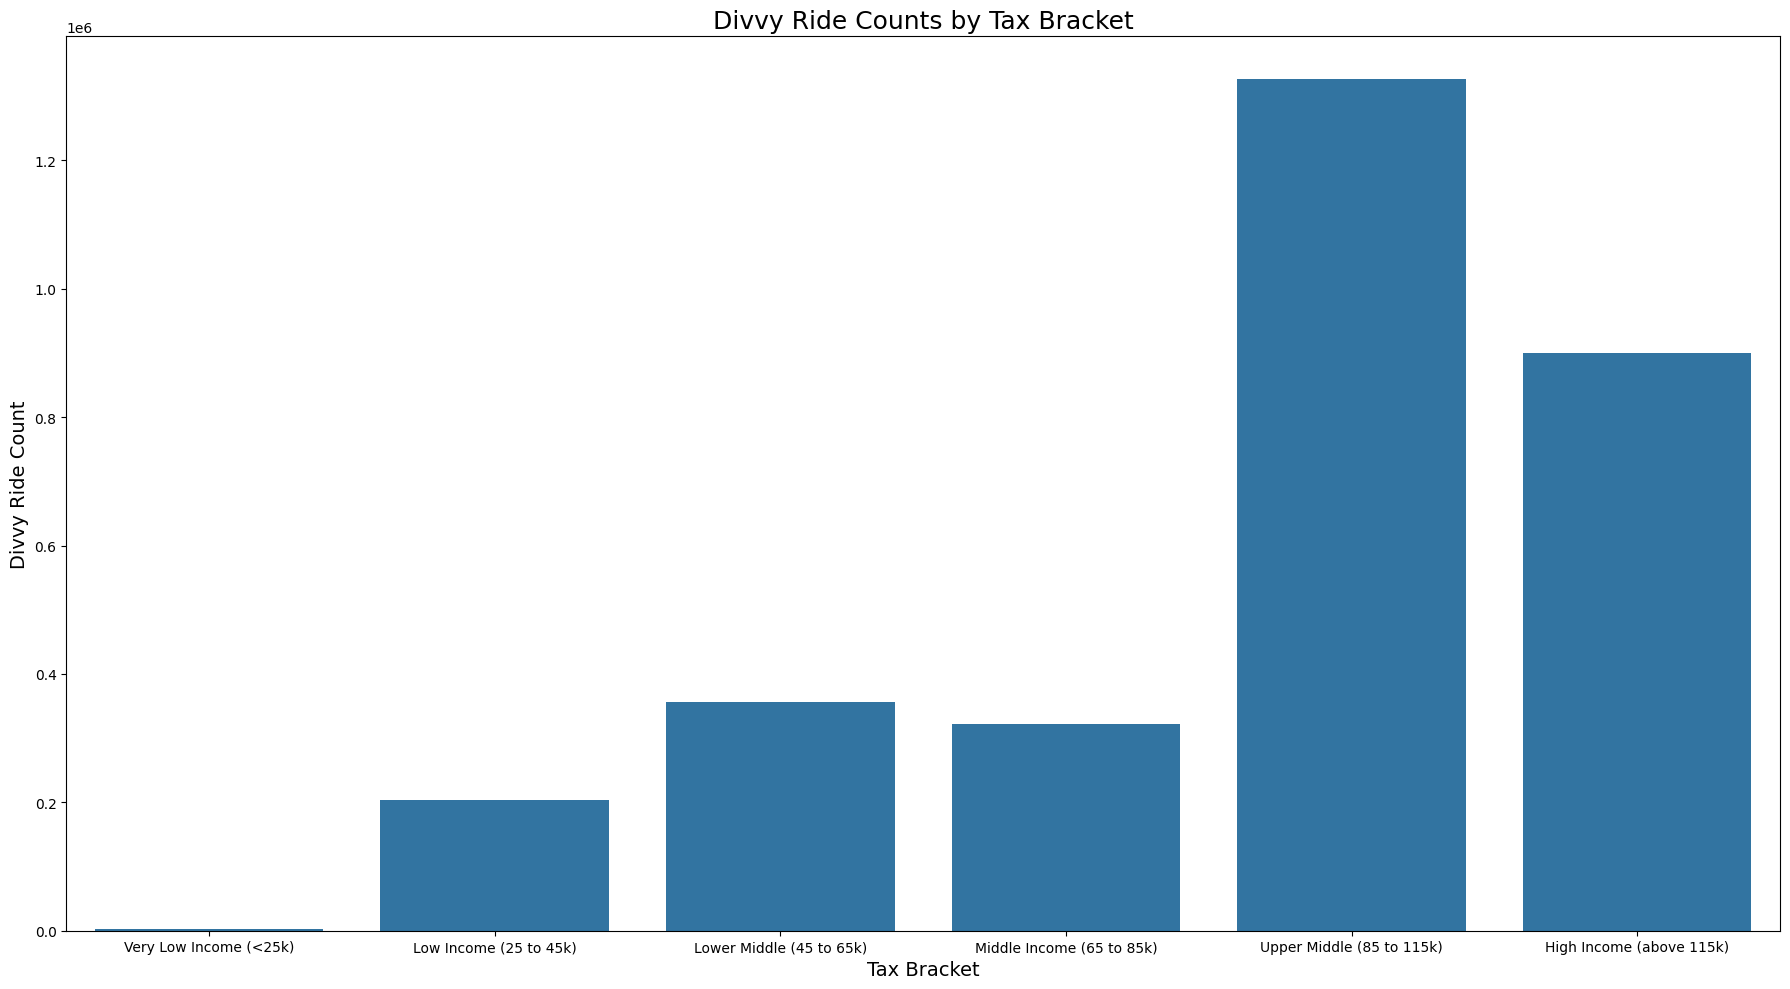

In [39]:
#| echo: false
# Barplot of Divvy Ride Counts by Tax Bracket - By Brandon Wolmer

bins = [0, 25000, 45000, 65000, 85000, 115000, np.inf]
labels = ['Very Low Income (<25k)', 'Low Income (25 to 45k)', 'Lower Middle (45 to 65k)', 'Middle Income (65 to 85k)', 'Upper Middle (85 to 115k)', 'High Income (above 115k)']
census_data['tax bracket'] = pd.cut(census_data['Median income (dollars)'], bins=bins, labels=labels)

figure = plt.figure(figsize=(18, 10))
sns.barplot(data=census_data, x='tax bracket', y = 'divvy_ride_count', estimator=np.sum, errorbar=None)
plt.xlabel('Tax Bracket', fontsize=14)
plt.ylabel('Divvy Ride Count', fontsize=14)
plt.title('Divvy Ride Counts by Tax Bracket', fontsize=18)
plt.tight_layout()

By Brandon Wolmer:

What did you do exactly? 

- The goal of this graph was to compare the total amount of rides orginating from communites that had different median incomes. The first step of this proccess was to bin the median income of each zip code into different income brackets(determined by the gov). Once that was done all I had to create a barplot using the x-axis as the binned income levels and the y-axis as the total ride counts.

Why did you think it would be successful? 

- I though it would be usefull to see how different socioecenomic communites were using divvy. And as you can the Upper middle class and High income communities make up over 70% of total divvy usage in chicago. while this might suggest a monetary barrier to entry some could argue the lower middle and middle class could still afford to use divvy which means its up to divvy to find out how to engage with more people who live in these underutilized communities.

What problems did you encounter? 

- the only real problem I had was deciding which binning method to use. However I quickly decided that using the government markers of socio-ecenomic status would be best.

In [42]:
#| echo: false
#Loading Census Tract shapefile for Chicago - By Brandon Wolmer

chi = gpd.read_file(r"../Census_Data/CensusTracts2010/CensusTractsTIGER2010.shp")
chi = chi.to_crs('EPSG:4326')

divvy_2020 = pd.read_csv("../Census_Data/divvy_2020.csv", index_col=0)

/var/folders/8x/z6r7wqnn0dj75xm3g1lwn7gm0000gn/T/ipykernel_54982/4090972013.py:7: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  divvy_2020 = pd.read_csv("../Census_Data/divvy_2020.csv", index_col=0)


In [43]:
#| echo: false
divvy_2020['tax bracket'] = divvy_2020['start_zip'].map(census_data['tax bracket'])

census_data['majority_race'] = census_data[race_cols].idxmax(axis=1)
census_data['age_group'] = census_data[age_cols].idxmax(axis=1)

divvy_2020['majority_race'] = divvy_2020['start_zip'].map(census_data['majority_race'])
divvy_2020['Majority_age_group'] = divvy_2020['start_zip'].map(census_data['age_group'])

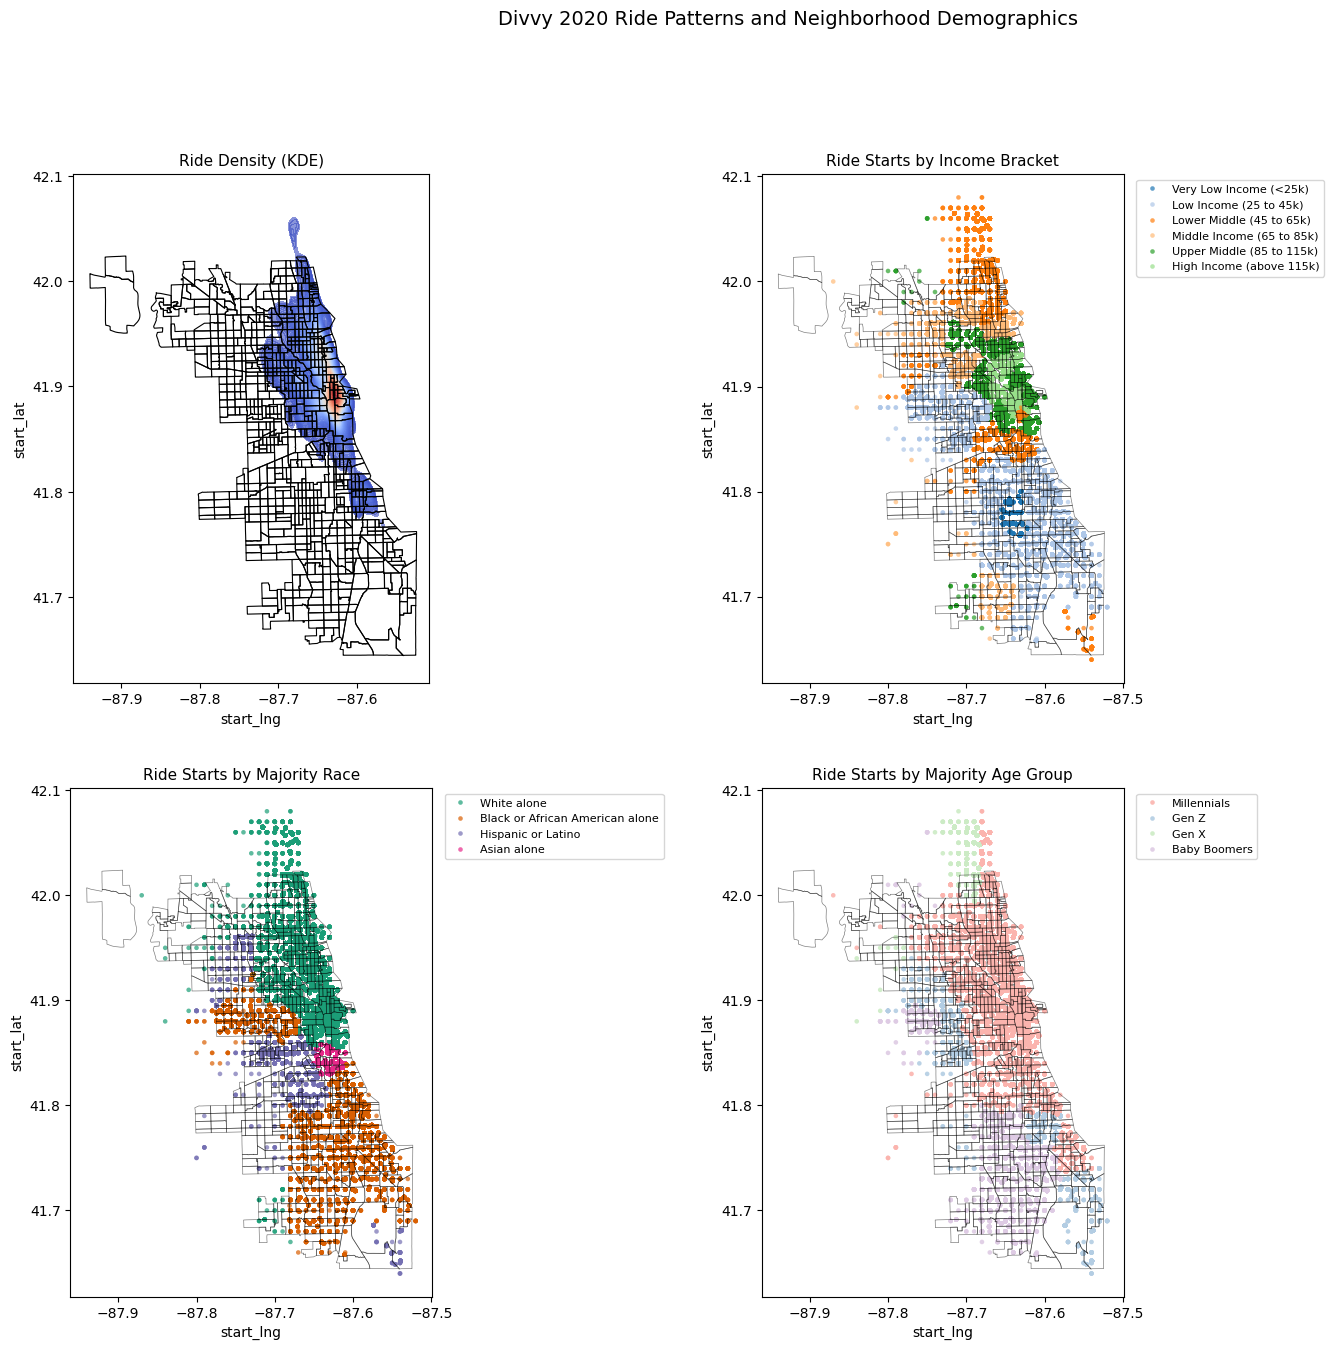

In [44]:
#| echo: false
#graphing ride start locations colored by demographic data - By Brandon Wolmer
#also including a kde plot of ride density

fig, axes = plt.subplots(2, 2, figsize=(18, 14))

sns.kdeplot(data=divvy_2020,x='start_lng',y='start_lat',fill=True,cmap='coolwarm',alpha=.6,levels=100,bw_adjust=2,ax=axes[0,0])
axes[0,0].set_title('Ride Density (KDE)', fontsize=11)
chi.plot(ax=axes[0,0],facecolor='none', edgecolor='black',linewidth=0.8)



sns.scatterplot(data=divvy_2020, x='start_lng',y='start_lat',hue='tax bracket', alpha=0.7,s=11,ax=axes[0,1], palette= 'tab20', linewidth=0)
axes[0,1].set_title('Ride Starts by Income Bracket', fontsize=11)
axes[0,1].legend(loc='upper left',bbox_to_anchor=(1.02, 1),fontsize=8)
chi.plot(ax=axes[0,1],facecolor='none', edgecolor='black',linewidth=0.5, alpha=0.5)



sns.scatterplot(data=divvy_2020, x='start_lng',y='start_lat',hue='majority_race',  alpha=0.7,s=11,ax=axes[1,0], palette= 'Dark2', linewidth=0)
axes[1,0].set_title('Ride Starts by Majority Race', fontsize=11)
axes[1,0].legend(loc='upper left',bbox_to_anchor=(1.02, 1),fontsize=8)
chi.plot(ax=axes[1,0],facecolor='none', edgecolor='black',linewidth=0.5, alpha=0.5)



sns.scatterplot(data=divvy_2020, x='start_lng',y='start_lat',hue='Majority_age_group',  alpha=0.9,s=11,ax=axes[1,1], palette= 'Pastel1', linewidth=0)
axes[1,1].set_title('Ride Starts by Majority Age Group', fontsize=11)
axes[1,1].legend(loc='upper left',bbox_to_anchor=(1.02, 1),fontsize=8)
chi.plot(ax=axes[1,1],facecolor='none', edgecolor='black',linewidth=0.5, alpha=0.5)



fig.suptitle('Divvy 2020 Ride Patterns and Neighborhood Demographics', fontsize=14, y=0.98)

plt.tight_layout(rect=[0, 0, 0.82, 0.95],pad=3)
plt.show()

By Brandon Wolmer:

What did you do exactly?

- So this first step in creating this graph was to map the majority race, age, and income of every zip code onto the divvy_2020 data set. once that was completed I had to read the shapefile for chicago then play around with seaborn and plyplot until I found a way to make the graph readable and appealing while still including all the information obtained from the chicago shapefile. Furthermore I createda density plot to show where the densities of where bike rides were originating in Chicago.

Why did you think it would be successful? 

- I thought this would be usefull for the stakeholders becasuse it not only would allow them to visualize where the most rides are being taken up but see th eproximity of zip codes that have the most rides and proximity of the demographics that make up those zip codes. by looking at this data It became even more apparant how segregrated chicago is and how that might exacerbating the disparity of divvy usage amongst demographics. 

What problems did you encounter? 

- I had a lot of trouble making the graph look readable when combining the standard elements of a graph with the shapefile
Did the very first thing you tried work? 
- honestly no what worked best was just playing around with the color pallete, linewidth, and opacity until the graphs looked presentable without loosing any information
- - so basically the solution was a lot of trial and error

## Discussion / Limitations (Optional)

You are welcome to introduce additional sections or subsections, if required, to address your questions in detail. For example, you may briefly discuss potential future work that the research community could focus on to make further progress in the direction of your project's topic.

### Limitations of Analysis 2
#### Rebecca Lazarus

This analysis provides a very specific snapshot of the comparison between Divvy and CTA data. I would liek to note that this analysis should not be used to make broad statements about all Divvy or CTA riders. This data and the graphs that I have made with it represent general trends but do not show the full experience of transportation in Chicago. This analysis should be used along iwth other data such as that of my teammates to create a more complete picture of the current state of Divvy ridership in Chicago.

### Limitations of Analysis 3
#### Victoria Yu
I would like to note that there are many other datasets that could be used to further enhance the analysis. For example, incorporating demographic data could provide insights into how different communities utilize Divvy bikes. I realized after completing my analysis that the scale of the businesses and permits were not accounted for, meaning that a small business was counted the same as a large business. This could skew the economic activity measure, as larger businesses may have a greater impact on bike demand. 

### Limitations of Analysis 4
#### Brandon Wolmer:

I think its worth pointing out the limitations of my analysis. I think one of the biggest limitations is the fact that not everyone starting divvy bike rides in a zipcode is from that zipcode. For example if someone at the age of 80 walked into a relatively young zipcode and used a Divvy bike I would have no way of factoring that into my analysis. Basically that is to say there may not be a discrepency in divvy usage between Race, income, and age, but rather the locations where white, young, and wealthy individuals live may be more optimal for bike riding(maybe these locations are near a park). There are plenty of example and counter examples, this is just somehting that may be helpful to note.

Another limitation of my analysis is the use of centroids. Because Zip codes arent perfect squares its possible to be in one zip code but be closer to another zipcodes centroid the one your currently in. Because of this some rides may be counted as being in one zipcode when really they were in another.

## Challenges and reflection

#### Analysis 2 - By Rebecca Lazarus
I expected the greatest challenges to be in cleaning and preparing data for analysis. This held fairly true as the hardest part seemed to be getting everythign set up so that our four different versions of analysis could tie together. Separately, I found that picking the best way to convey my findings presented a challenge. I started out with different graph choices and revised my analysis as the data started to show me different trends than I had anticipated.

#### Analysis 3 - By Victoria Yu
I expected the challege to be finding a connection within the communities and using the longitude and latitude to successfully group with chicago borders. This turned out to be easy to learn and I developed many skills in analyzing geographic data. 
I decided to change my focus from economic qualities to population and economic boost. This was because I realized that economic qualities need context like age, gender, ethnicity, income level to be useful. I wanted to still give suggestions on where to build new docks, so I focused on the MMRP permits and business licenses to find areas of potential growth. This was successfull because the data aligned with the programs of the Chicago government, proving that revitalization is already being planned in these areas. 

#### Ananlysis 4 - By Brandon Wolmer

When I came into this I expected that the hardest part would be cleaning, preparing, imputing the data and for the msot part I was correct. The hardest part for me was definantyl getting all the census data into a format that was actually usable. A problem I wasn;t expecting to have was actually figuring out how to actually know which demographic data corresponded to which bikeride, I knew latitude and longitude had to be involved but I hard a hard time figuring out how to get each one into the right zipcode. At first I tried dowloading a really complex dataset that had the boundaries of every zipcode, but I found that too challenging and opted in for a slighlty less accurate but simpler approach of using the euclidean distance to each zipcodes centroids. I think honestly what I learned most from this was not to get analysis paralysis and to focus on what matters instead of perfectionism.

## Conclusions

The analysis definitely do work with eachother to answer a bigger question. I think they come together to answer the question of where and when is divvy used the most/least. By looking at all 4 of our analysis it becomes apparent during which times of the day, which seasons of the year, which locations, and which kinds of people are using divvy the most and the least.

Additionally, our analysis has showed an interesting trend: people may not use divvy bikes as a main source of transportation. As evident by our analysis in which we determined the correlation between traffic congestion and ridership, there was no strong correlation. This likely means that riders opt for divvy rides for means other than transportation, such as leisure or exercise. 

## Recommendations to stakeholder(s)

### Analysis 1 - By Jonas Goldberg

The data seems to generalize well over the years provided. Each year, specific stations had significantly more rides than others. Additionally, ridership would always peak in the summer and plummet in the winter. There was a notable pattern across each year in the dataset that appears to generalize well. 

### Analysis 2 - By Rebecca Lazarus

Stakeholders should use my analysis to asses the current use of their product and where they want to go in the future. SInce it seems that Divvy's goal is to expand accessibility and equity through their services, I would reccommend taking this data and shifting its strategies (could be through building new stations, different marketing, pricing, ect.) to make Divvy bikes a tool for all. While it seems that currently the majority of Divvy bikes are used for leisure, this presents Divvy with the opportunity to find new ways to fulfil the mission of expanding equity and access. 

### Analysis 3 - By Victoria Yu
Considering business concentration and MMRP communities, I recommend that Divvy consider Englewood, Woodlawn, and Grand Boulevard for future dock installations. These communities show high economic activity but low Divvy station counts, indicating potential demand for bike access. Additionally, Divvy could collaborate with local businesses in these areas to promote bike usage and integrate bike access into community revitalization efforts.
However, I suggest a deeper dive into the specific types of businesses and the scale of MMRP permits in these communities to better understand the nature of economic activity. Demographic data of these communities and past divvy demographics will provide a more comprehensive picture of bike demand and inform more targeted dock installation strategies.

### Analysis 4 - By Brandon Wolmer

Barring the limitations I spoke of earlier in the report and the fact that this data is from 5 years ago(they may need to update when the new census data comes out) I think I can accurately say based on my analysis future steps for stakeholders. First off It appears that there may be a monetary barrier to entry when it coems to divvy since low income and even lower middle income households simply aren't using divvy, it might be in divvy's best interest to launch a marketing campaighn explainging why divvy is affordable, or offering some kind of more affordable deal that is mutually benificial. The second aspect to look at is age. While the data is slightly outdated it appears that Divvy is most popular with mellenials and less so with generation X and Gen Z. Im intentioning leaving out gen alpha as most of them are too young to be renting out divvybikes and the baby boomer generation who on average are simply too old to get on a bike. Because of this I think its best to launch a marketing campaighn targeting gen Z and gen X as this are people who are potential customers where are not being utilized. Finally the last factor to look at is Race. It is of my opinion that the lack of Divvy usage amonst people specific racial groups is due to the seggregation of chicago more than anything else. by looking at my thrid graph you can see just how much chicago is segregated, because of this I suggest simply adding more divvy stations in these regions of chicago, particularly the southside.

## AI Tools and Assistance (Disclosure — for course purposes) {-}

### Analysis 2 - Rebecca Lazarus
I used Chat GPT to figure out specific syntax for some of my axis formations. "ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))"
While I understood the ax.xaxis.set_major part, I used chat GPT to figure out hte best ways to format my dates and ad commas for thousands on the y axis. Everything else in my section as well as the cleanign of the Divvy Data is my own work. 

### Analysis 3 - Victoria Yu
I used Chat GPT to teach me how to group latitude and longitude points into Chicago community areas using spatial join, and plotting with a loop. I had many errors in my code as I tried to combine the business and mmrp data, and I asked Chat GPT for explainations to the error prompt. I also used Chat GPT to help me check and delete repetitive code and combine my final three graphs into one. The divvy dataset cleaning, all graphs, and the final bike need index analysis are completely my own work.

### Analysis 4 - Brandon Wolmer

I used chat GPT to help me twice. The first is when I needed help when converting the data types in my census dataframe into numeric, specifically I ONLY NEEDED HELP with the parameters used in the .replace() function essentionally using chatgpt for clarification. Everything else is my work. The second is when I loaded in the shapefile for chicago, I only needed help in two ways A) understanding the structure of the shapefile, and B) defining chi as chi = chi.to_crs('EPSG:4326'). That is it everything else is completely my own work.